In [4]:
#importing some useful packages
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
import math
%matplotlib inline

In [1]:
import os
PATH = "test_images/"
test_imgs = os.listdir(PATH)
test_imgs



original_image_names = list(map(lambda name: PATH + name, test_imgs))
print(original_image_names)


['test_images/solidWhiteCurve.jpg', 'test_images/solidWhiteRight.jpg', 'test_images/solidYellowCurve.jpg', 'test_images/solidYellowCurve2.jpg', 'test_images/solidYellowLeft.jpg', 'test_images/whiteCarLaneSwitch.jpg']


In [2]:
def show_image_list(img_list, cols=2, fig_size=(15, 15), img_labels=original_image_names, show_ticks=True):
    img_count = len(img_list)
    rows = img_count / cols
    cmap = None
    plt.figure(figsize=fig_size)
    for i in range(0, img_count):
        img_name = img_labels[i]
        
        plt.subplot(rows, cols, i+1)
        img = img_list[i]
        if len(img.shape) < 3:
            cmap = "gray"
        
        if not show_ticks:
            plt.xticks([])
            plt.yticks([])
            
        plt.title(img_name[len(test_imgs):])    
        plt.imshow(img, cmap=cmap)

    plt.tight_layout()
    plt.show()

Total image count:  6


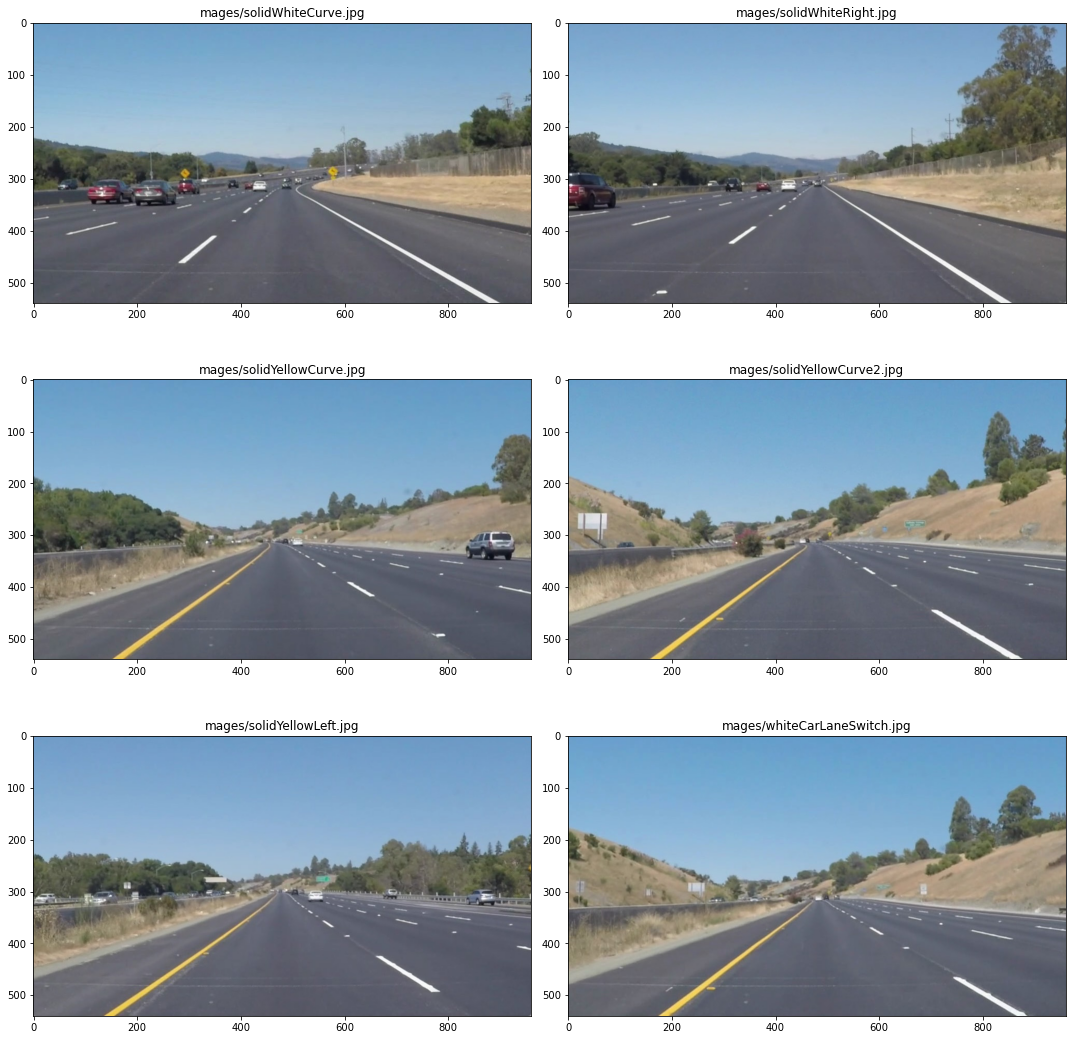

In [5]:
original_images = list(map(lambda img_name: mpimg.imread(img_name), original_image_names))
print("Total image count: ", len(original_images))
allImages = show_image_list(original_images)
allImages

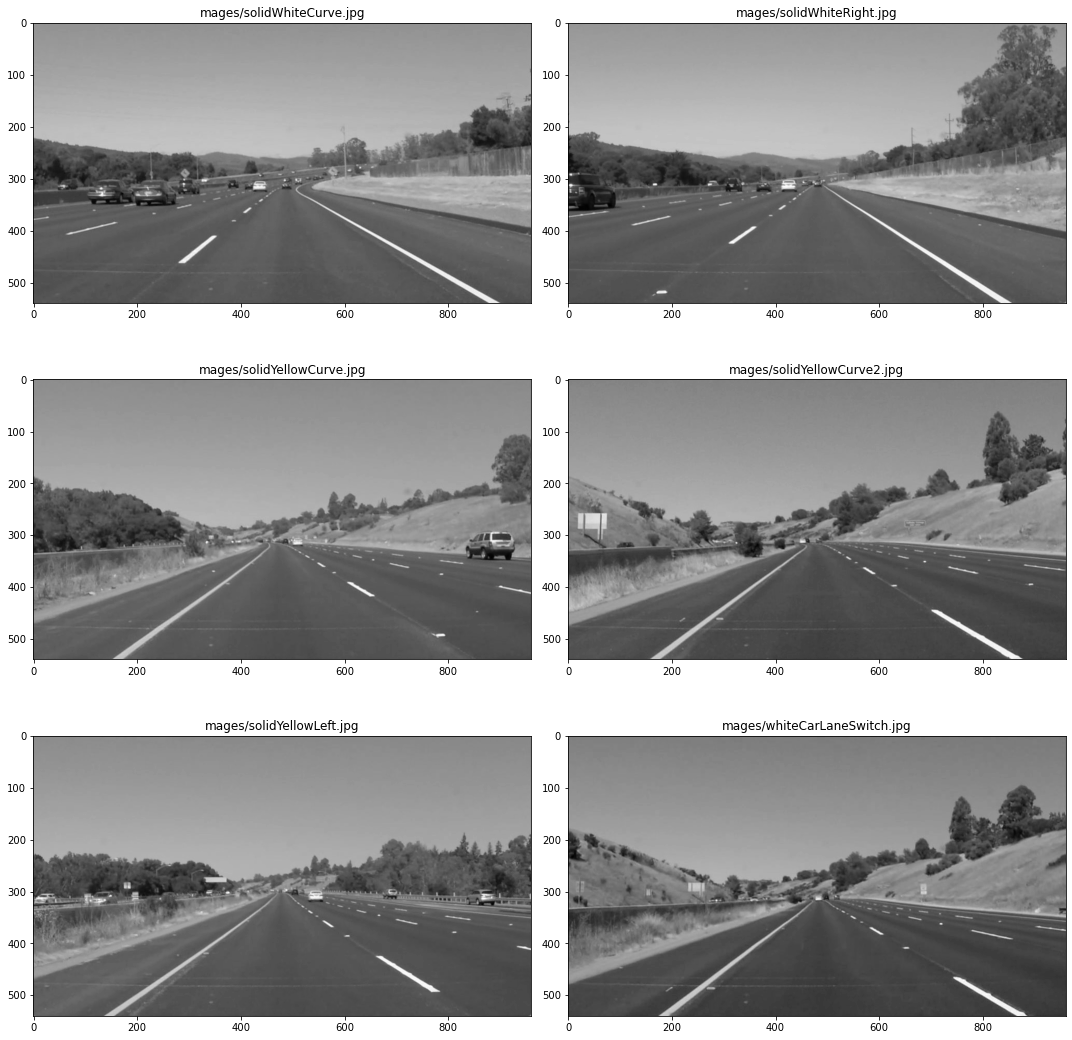

In [28]:
def grayscale(img):
    return cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

gray_images = list(map(lambda img: grayscale(img), original_images))

show_image_list(gray_images)

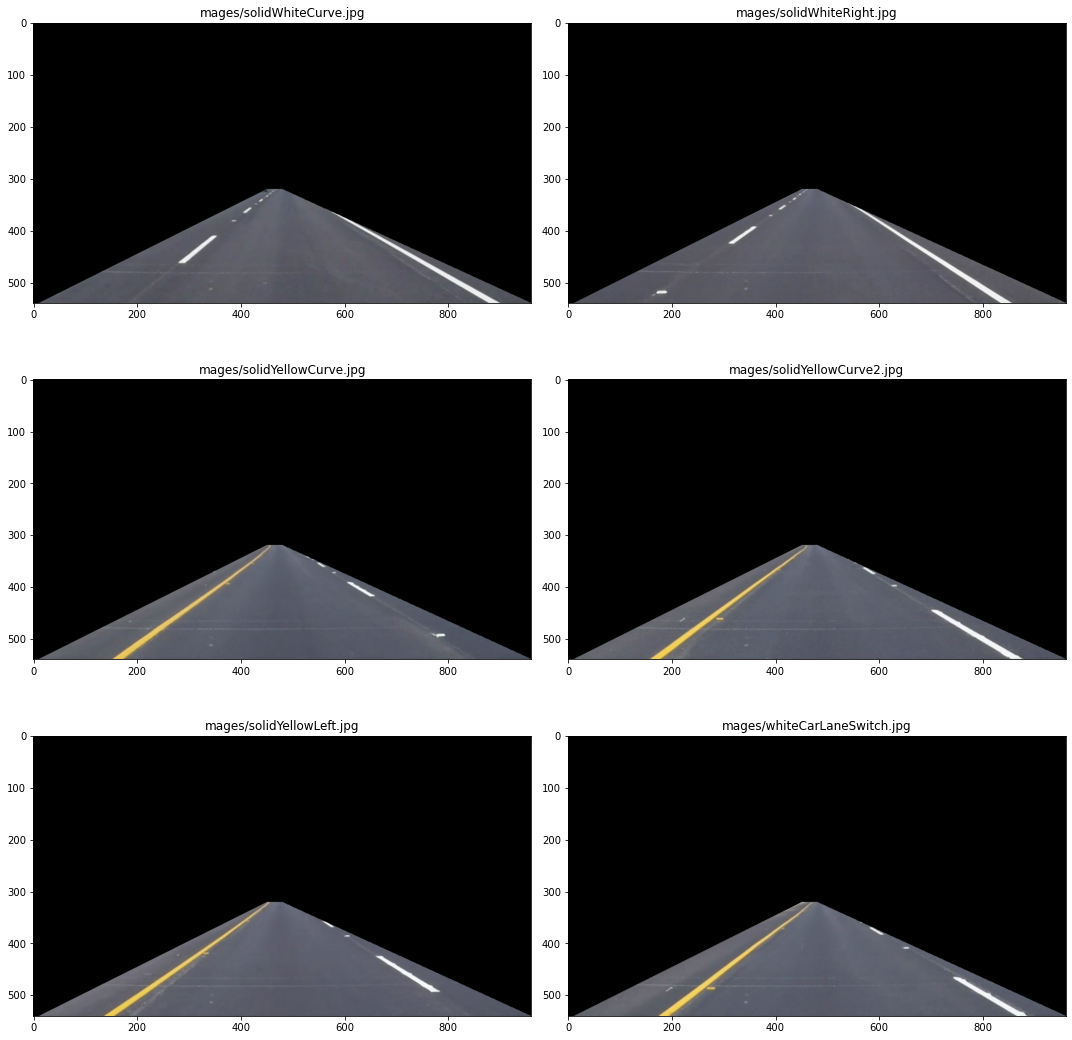

In [29]:
imshape = original_images[1].shape
vertices = np.array([[(10,imshape[0]),(450,320),(480,320),(imshape[1],imshape[0])]],dtype=np.int32)

def region_of_interest(img, vertices):
    #defining a blank mask to start with
    mask = np.zeros_like(img)   
    
    #defining a 3 channel or 1 channel color to fill the mask with depending on the input image
    if len(img.shape) > 2:
        channel_count = img.shape[2]  # i.e. 3 or 4 depending on your image
        ignore_mask_color = (255,) * channel_count
    else:
        ignore_mask_color = 255
        
    #filling pixels inside the polygon defined by "vertices" with the fill color    
    cv2.fillPoly(mask, vertices, ignore_mask_color)
    
    #returning the image only where mask pixels are nonzero
    masked_image = cv2.bitwise_and(img, mask)
    return masked_image

polygon = list(map(lambda img: region_of_interest(img,vertices), original_images))

show_image_list(polygon)

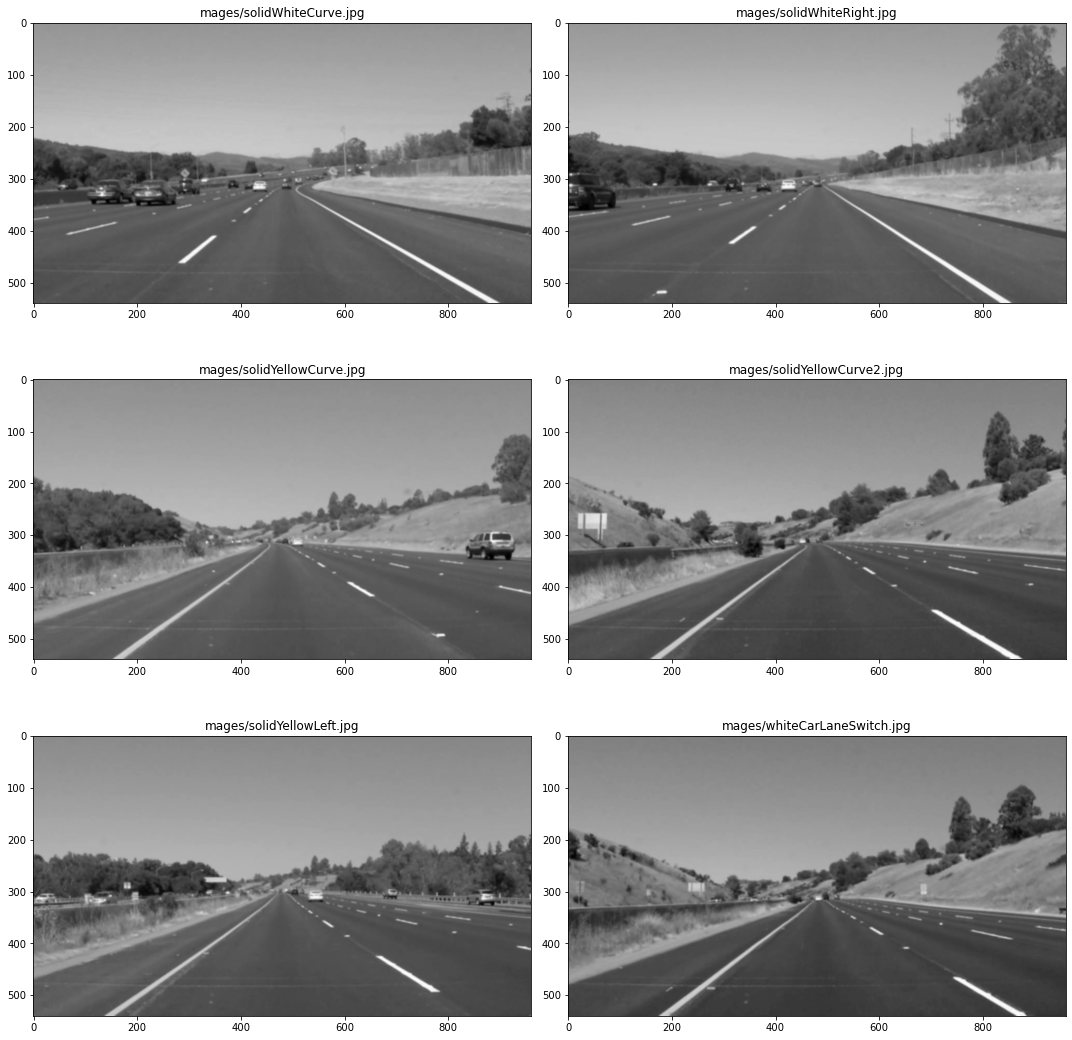

In [44]:
kernel_size = 5  

def gaussian_blur(img, kernel_size):
    return cv2.GaussianBlur(img, (kernel_size, kernel_size), 0)

guassianImage = list(map(lambda img: gaussian_blur(img,kernel_size), gray_images))

show_image_list(guassianImage)

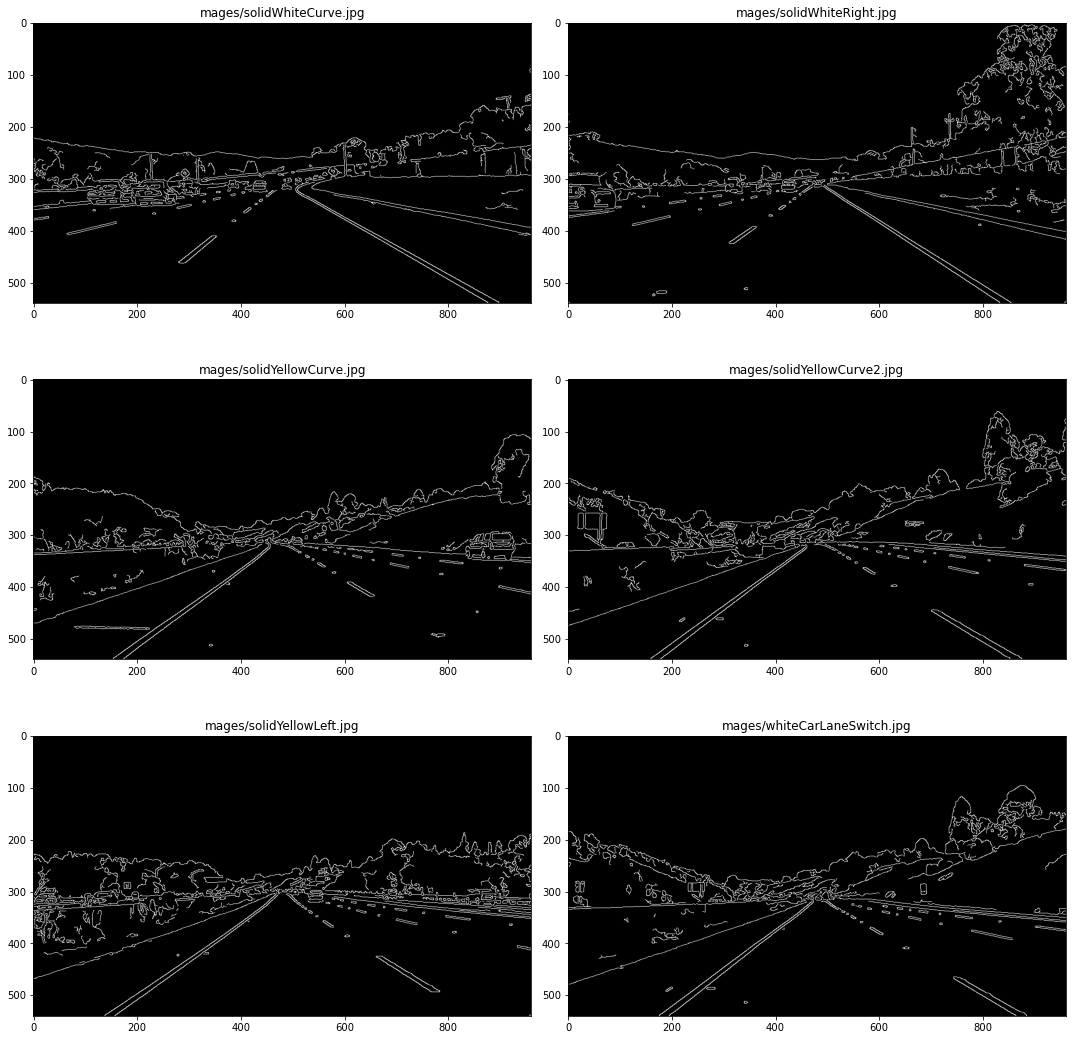

In [47]:
low_threshold = 10
high_threshold = 100

def canny(img, low_threshold, high_threshold):
    return cv2.Canny(img, low_threshold, high_threshold)

cannyImage = list(map(lambda img: canny(img,low_threshold,high_threshold), guassianImage))

show_image_list(cannyImage)

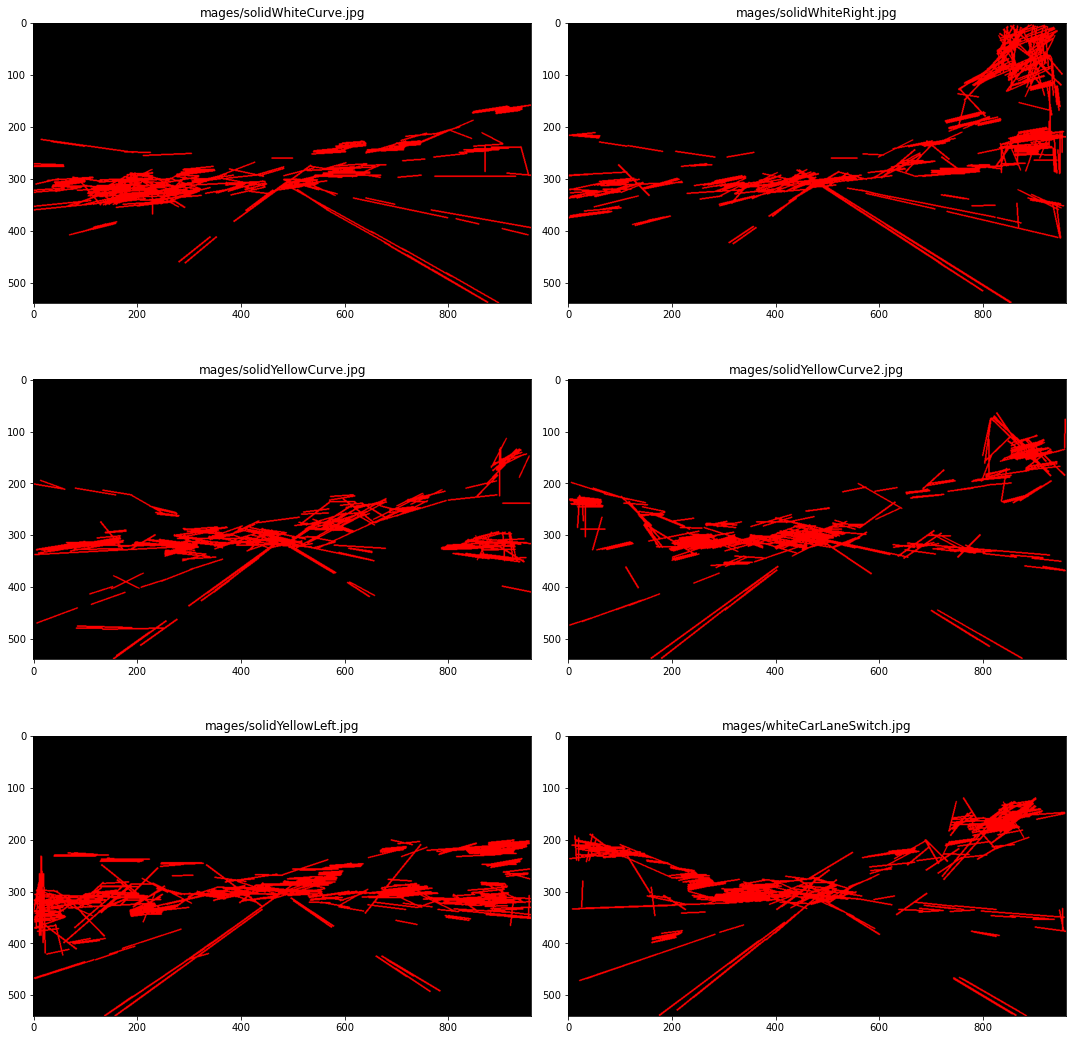

In [98]:
rho=2
theta = np.pi/180
threshold = 15
min_line_len = 40
max_line_gap = 20



def draw_lines(img, lines, color=[255, 0, 0], thickness=2):
    for line in lines:
        for x1,y1,x2,y2 in line:
            cv2.line(img, (x1, y1), (x2, y2), color, thickness)

def hough_lines(img, rho, theta, threshold, min_line_len, max_line_gap):
    lines = cv2.HoughLinesP(img, rho, theta, threshold, np.array([]), minLineLength=min_line_len, maxLineGap=max_line_gap)
    line_img = np.zeros((img.shape[0], img.shape[1], 3), dtype=np.uint8)
    draw_lines(line_img, lines)
    return line_img

hougeImage = list(map(lambda img: hough_lines(img, rho, theta, threshold, min_line_len, max_line_gap), cannyImage))

show_image_list(hougeImage)

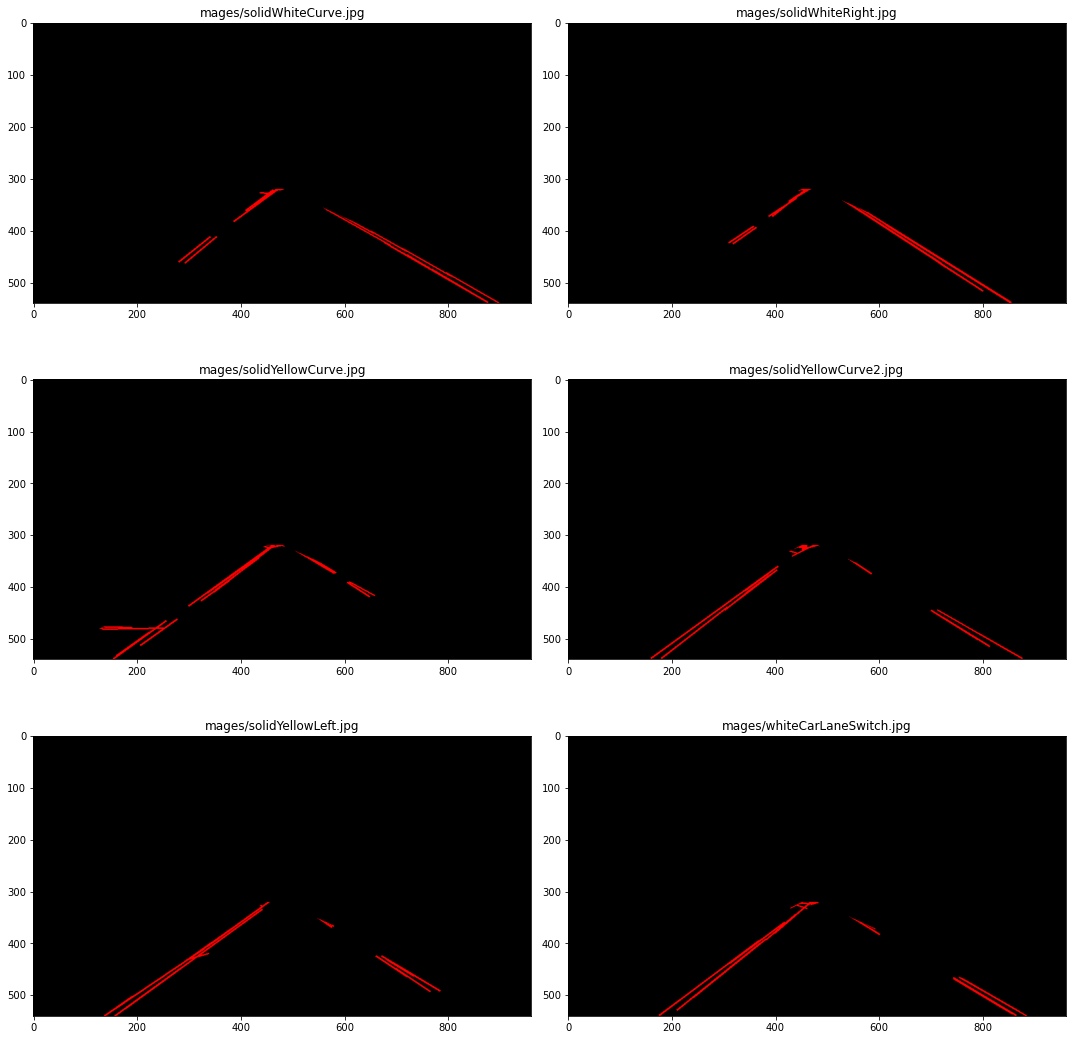

In [121]:
"""Applying region of interest on houge image to get the results"""
FinalImages = list(map(lambda img: region_of_interest(img,vertices), hougeImage))

show_image_list(FinalImages)

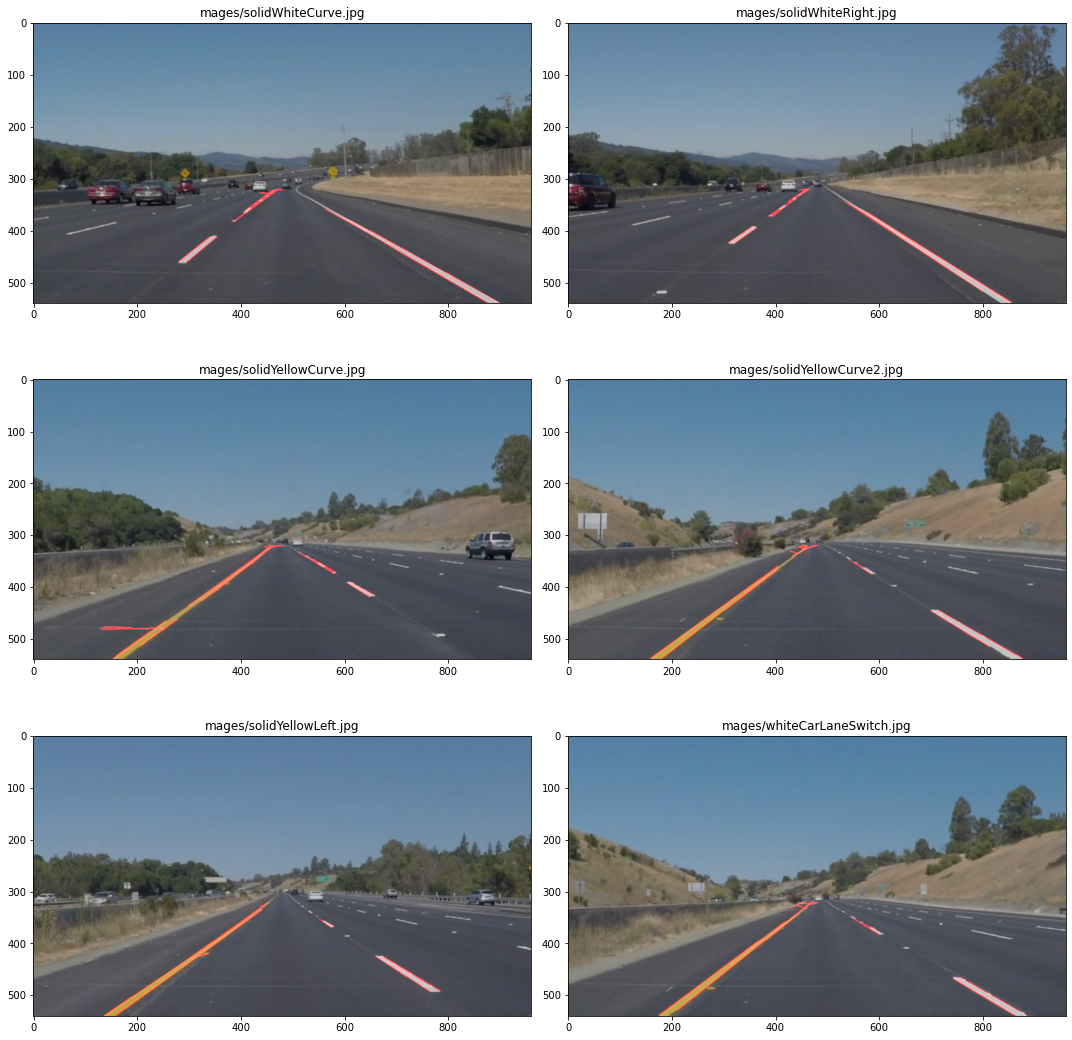

In [153]:
results_to_show = []

def weighted_img(img, initial_img, α=0.8, β=1., γ=0.):
    return cv2.addWeighted(initial_img, α, img, β, γ)

for (original_image, lines_img) in zip(original_images, FinalImages):
  img_with_lines = weighted_img(lines_img, original_image)
  results_to_show.append(img_with_lines)
show_image_list(results_to_show)